In [1]:
#@title Importing Packages

# Utility
import math as math
import numpy as np
import pandas as pd
import random as rdm
import scipy.io as io
import scipy.stats as stats
from google.colab import drive
import networkx as nx

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.animation import FuncAnimation
from functools import partial

# Binomial

In [3]:
#@title Function to plot pdf of distribution

def plotPDF(dist, mean, true):

    sample = dist.rvs(10000)
    plt.hist(sample, bins = int(len(sample)/100))

    maxValue = findMode(sample)[1]
    plt.plot([mean, mean], [0, maxValue], label = 'Mean')
    plt.plot([true, true], [0, maxValue], label = 'True value')

    plt.legend()
    plt.show()



In [4]:
#@title function to plot walk of single parameter

def plotWalk(sample, true):

    plt.plot(range(len(sample)), sample)
    plt.plot([0, len(sample)], [true, true], label = 'True value')
    plt.legend()
    plt.show()

The true value of p is 0.062


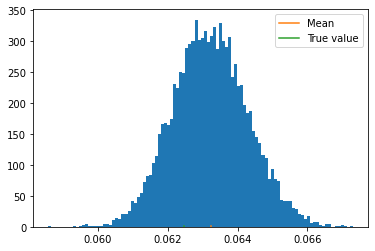

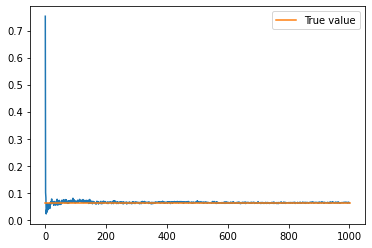

In [188]:
#@title Gibbs sampler for binomial distribution
pTrue = stats.uniform.rvs()

likelihood = stats.binom(1, pTrue)

a = 1
b = 1
prior = stats.beta(a, b)
pSample = [prior.rvs()]

for i in range(1000):

    sample = likelihood.rvs(rdm.randint(0, 100))

    n = len(sample)
    y = sum(sample)

    a = a + y
    b = b + n - y

    mean = a/(a + b)
    posterior = stats.beta(a, b)
    pSample.append(posterior.rvs())

print(f"The true value of p is {format(pTrue, '.3f')}")
plotPDF(posterior, mean, pTrue)
plotWalk(pSample, pTrue)

X: 0.6674459628091333 2.1996426835545355
P1:  0.0 0.10894749547665578
P2:  0.9999999999999999 0.18866709334128143

X: 0.6674459628091333 0.2588946000917807
P1:  0.9999999999999997 0.19780689231951717
P2:  0.9999999999999999 0.18866709334128143

X: 0.2588946000917807 -0.3939585407446719
P1:  0.0 0.19563861351756656
P2:  0.9999999999999997 0.19780689231951717

X: 0.2588946000917807 1.3213907612712879
P1:  0.0 0.1603582495914059
P2:  0.9999999999999997 0.19780689231951717

X: 0.2588946000917807 0.8457261938343599
P1:  0.9999999999999998 0.18241110634764052
P2:  0.9999999999999997 0.19780689231951717

X: 0.8457261938343599 1.1688000257704312
P1:  0.0 0.16815864977458153
P2:  0.9999999999999998 0.18241110634764052

X: 0.8457261938343599 2.3779982351428743
P1:  0.0 0.0983773027581718
P2:  0.9999999999999998 0.18241110634764052

X: 0.8457261938343599 1.7811474187974767
P1:  0.0 0.13417015385001294
P2:  0.9999999999999998 0.18241110634764052

X: 0.8457261938343599 1.6754711030988014
P1:  0.0 0

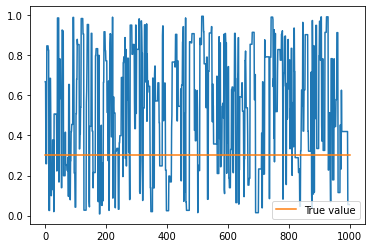

In [7]:
#@title Metropolis-Hastings for binomial - Not working
pTrue = stats.uniform.rvs()

likelihood = stats.binom(1, pTrue)

a = 1
b = 1
prior = stats.beta(a, b)
pSample = [prior.rvs()]

xNaught = stats.uniform(0, 1).rvs()
posterior = np.zeros((1000,))

for t in range(1000):
    posterior[t] = xNaught

    x = stats.norm(loc = xNaught).rvs() # candidate
    print("X:", xNaught, x)
    p1 = stats.beta.pdf(x, a, b) * stats.norm.pdf(x, 0, 2) # prior * likelihood 
    print("P1: ", stats.beta.pdf(x, a, b), stats.norm.pdf(x, 0, 2))
    p2 = stats.beta.pdf(xNaught, a, b) * stats.norm.pdf(xNaught, 0, 2) # prior * likelihood 
    print("P2: ", stats.beta.pdf(xNaught, a, b), stats.norm.pdf(xNaught, 0, 2))
    print("")
    alpha = p1/p2 # ratio
    u = stats.uniform(0, 1).rvs() # random uniform

    if u < alpha:
        xNaught = x # accept

plotWalk(posterior, pTrue)

# Normal

In [242]:
#@title Gibbs Sampler for normal distribution - Mu working, Sigma squared not

# Initial sample
y = [1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08]
n = len(y) 
ybar = np.mean(y)
s2 = np.var(y)

print(ybar, s2)

# Prior
mu0 = 1.9
kappa0 = 1
t20 = (mu0/stats.norm.ppf(0.975))
s20 = 0.01
nu0 = 1

print(mu0, s20)
# Initialising array
S = 10000
phi = [ybar, s2]
PHI = np.zeros((S, 2))
PHI[0, :] = phi

rdm.seed(1)
for s in range(1, S):

    mun = (mu0/t20 + n*ybar/phi[1])/(1/t20 + n/phi[1])
    t2n = 1/(1/t20 + n/phi[1])

    phi[0] = stats.norm(mun, np.sqrt(t2n)).rvs(1)

    # Sample sigmaˆ2 from its full conditional based on theta

    nun = nu0 + n
    kappan = kappa0 + n
    s2n = (nu0*s20 + (n - 1)*s2 + (ybar - phi[0])**2)/nun

    # This posterior distribution: inverse-gamma(nu_n/2,sigmaˆ2_n(\theta)
    phi[1] = stats.invgamma(nun/2, s2n*nun/2).rvs(1)

    PHI[s, :] = phi


1.8044444444444447 0.015002469135802478
1.9 0.01


<ipython-input-242-afa449e33219>:42: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  PHI[s, :] = phi


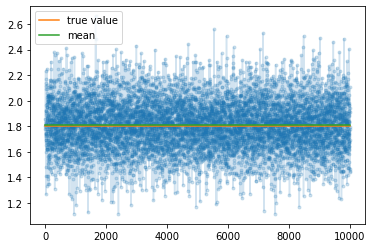

In [229]:
#@title Plotting walk of mean

plt.plot(range(10000), PHI[:, 0], '.-', alpha = 0.2)
plt.plot([0, 10000], [ybar, ybar], label = 'true value')
plt.plot([0, 10000], [np.mean(PHI[:, 0]), np.mean(PHI[:, 0])], label = 'mean')

plt.legend()

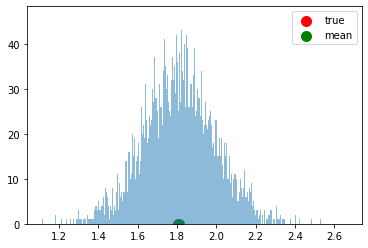

In [230]:
#@title Plotting histogram of mean

plt.hist(PHI[:, 0], bins = 1000, alpha = 0.5)
plt.scatter(ybar, 0, s = 100, c = 'r', label = 'true')
plt.scatter(np.mean(PHI[:, 0]), 0, s = 100, c = 'g', label = 'mean')

plt.legend()

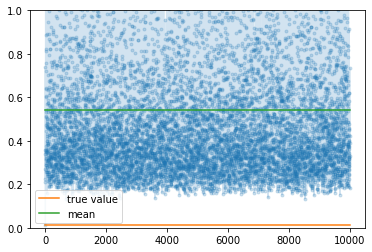

In [238]:
#@title Plotting walk of sigma squared

plt.plot(range(10000), (PHI[:, 1]), '.-', alpha = 0.2)
plt.plot([0, 10000], [s2, s2], label = 'true value')
plt.plot([0, 10000], [np.mean(PHI[:, 1]), np.mean(PHI[:, 1])], label = 'mean')
plt.ylim(0, 1)
plt.legend()

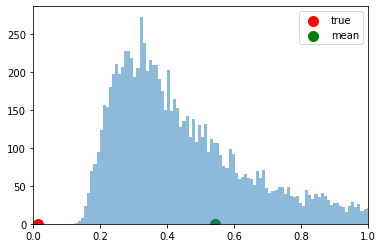

In [239]:
#@title Plotting histogram of sigma squared

plt.hist((PHI[:, 1]), bins = 1000, alpha = 0.5)
plt.scatter(s2, 0, s = 100, c = 'r', label = 'true')
plt.scatter(np.mean((PHI[:, 1])), 0, s = 100, c = 'g', label = 'mean')
plt.xlim(0, 1)
plt.legend()

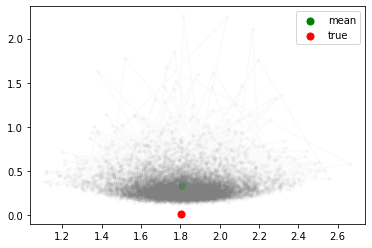

In [233]:
#@title Plotting mean vs sigma-squared

plt.scatter(np.mean(PHI[:, 0]), np.mean(PHI[:, 1]), s = 50, c = 'g', label = 'mean')
plt.plot(PHI[:, 0], PHI[:, 1], '.-', alpha = 0.04, c = 'grey')
plt.scatter(ybar, s2, s = 50, c = 'r', label = 'true')

plt.legend()